# 넷플릭스 예제

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
from pandas import read_csv, DataFrame, pivot_table
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
print(os.getcwd())

c:\Users\yis82\OneDrive\Desktop\bigdata_analysis\F DataMining\05-Cluster Analysis


### 영화 데이터 가져오기

실 분석용은 아니다. 분석 후 결과값을 맵핑시키기 위한 데이터이다.

#### 영화 데이터 가져오기

In [4]:
origin_mv = read_csv('c:/Users/yis82/OneDrive/Desktop/bigdata_analysis/F DataMining/05-Cluster Analysis/netflix/Netflix_Dataset_Movie.csv',
                     encoding = 'utf-8')
origin_mv.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


#### 별점 데이터 가져오기

In [44]:
origin_rating = read_csv('c:/Users/yis82/OneDrive/Desktop/bigdata_analysis/F DataMining/05-Cluster Analysis/netflix/Netflix_Dataset_rating.csv',
                     encoding = 'utf-8')
origin_rating.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [58]:
len(origin_rating['User_ID'])

17337458

#### 재생 수로 나열하여 일정 재생 수 이상의 영화 확인

In [67]:
views = origin_rating.filter(['Movie_ID','User_ID']).groupby("Movie_ID").count().sort_values('User_ID',ascending=False)
views.rename(columns={"User_ID": "Views"},inplace=True)
views

,Views
Movie_ID,
1905,117075
2452,102721
4306,102376
571,101450
3860,98545
...,...
4161,1215
1375,1213
717,1212


### 시각화

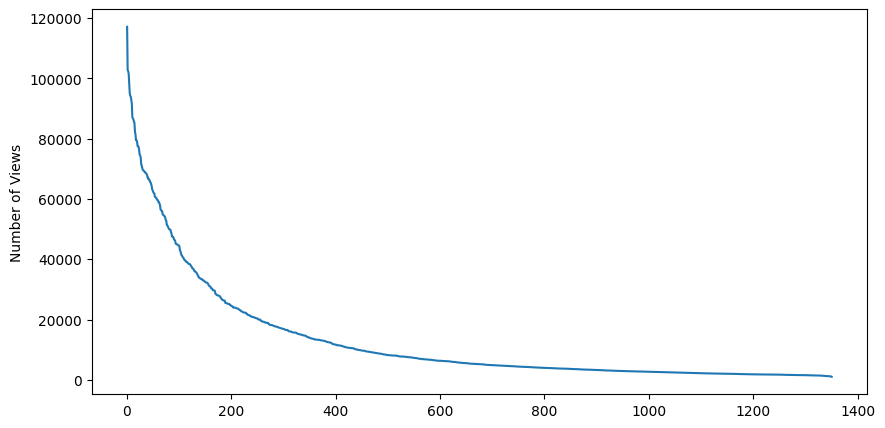

In [68]:
plt.figure(figsize=(10,5))
sb.lineplot(data = views, y= "Views", x= range(1, len(views.index)+1))
plt.ylabel("Number of Views")
plt.show()
plt.close()

## 03. 데이터 전처리

60000회 이상 시청된 영화만 이용하여 사용자당 선호하는 영화 파악하기

In [83]:
index = views.where(views['Views'] > 60000).dropna()
index.reset_index(inplace= True)
index

,Movie_ID,Views
0,1905,117075.0
1,2452,102721.0
2,4306,102376.0
3,571,101450.0
4,3860,98545.0
5,2862,95053.0
6,3962,94235.0
7,4432,93886.0
8,3938,92893.0
9,2782,91502.0


#### Movie_ID를 이용하여 rating dataframe 생성

In [89]:
rating_df = origin_rating.loc[origin_rating['Movie_ID'].isin(index['Movie_ID'])]
rating_df   

,User_ID,Rating,Movie_ID
63663,2473170,5,30
63664,900816,3,30
63665,1990901,4,30
63666,1402412,4,30
63667,1601783,3,30
...,...,...,...
17252340,1021220,4,4472
17252341,158902,4,4472
17252342,2438535,4,4472
17252343,575058,3,4472


#### 0점인 경우 해당 유저는 그 영화를 보지 않은 것으로 정의

In [110]:
rating_table = rating_df.pivot_table(values="Rating", index='User_ID', columns="Movie_ID", fill_value = 0)
rating_table

Movie_ID,30,175,191,313,457,483,571,607,758,798,...,3917,3925,3938,3962,4043,4123,4306,4356,4432,4472
User_ID,,,,,,,,,,,,,,,,,,,,,
6,3,5,2,0,5,0,0,0,0,0,...,0,3,4,4,5,0,4,4,3,3
7,5,5,4,5,5,0,4,3,4,5,...,5,5,4,5,4,4,5,4,5,3
79,3,0,4,0,0,4,0,5,2,3,...,1,4,5,5,0,4,5,4,4,4
97,0,3,0,3,0,1,3,3,0,0,...,0,3,0,0,4,4,5,4,0,0
134,0,0,5,0,3,5,4,5,0,4,...,0,5,5,5,5,0,5,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649370,0,0,0,4,5,4,5,0,0,0,...,5,0,4,4,4,0,0,4,0,0
2649378,3,0,3,2,3,0,5,0,0,0,...,0,4,4,4,2,4,4,2,3,0
2649388,3,0,0,4,0,0,3,0,0,0,...,0,3,0,0,0,0,4,0,0,3


## 04. 분류 모델 구축